In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action = 'ignore')

In [2]:
df=pd.read_csv("Lending_TRAINING_DATA.csv")
df

APPLICATION.ID   DSA.ID  DEALER.ID    APP.DATE TIME.STAMP  \
0        27497000024  JB02005      27497  2017-02-28   22:11:01   
1        25556001005  RD02622      25556  2017-02-28   22:05:51   
2        27220000249  SK02345      27220  2017-02-28   21:58:34   
3        27067000029  DN30900      27067  2017-02-28   21:52:46   
4        26189000138  JB02005      26189  2017-02-28   21:52:33   
...              ...      ...        ...         ...        ...   
7754     25150001203  RP05168      25150  2017-02-22   10:43:08   
7755     27199000069  RS24113      27199  2017-02-22   10:41:45   
7756     26805000032  SB44646      26805  2017-02-22   10:34:56   
7757     28188000004  JD25733      28188  2017-02-22   10:24:20   
7758     27059000043  PJ58585      27059  2017-02-22   09:50:43   

     APPLICATION.STATUS                   QUEUE.ID CURRENT.STAGE  \
0              Declined  Straight  Through Process         PD_DE   
1              Approved  Straight  Through Process         PD_DE   
2              Approved  Straight  Through Process         PD_DE   
3              Declined               Under.Writer          DCLN   
4              Approved  Straight  Through Process          APRV   
...                 ...                        ...           ...   
7754           Approved  Straight  Through Process          APRV   
7755           Declined  Straight  Through Process         PD_DE   
7756           Declined               Under.Writer          DCLN   
7757           Approved  Straight  Through Process      LOS_DISB   
7758           Approved  Straight  Through Process       INV_GNR   

     MARITAL.STATUS GENDER  ...  CREDIT.CARD.NUMBER CREDIT.CARDS.CATEGORY  \
0            Single   Male  ...                 NaN                   NaN   
1           Married   Male  ...                 NaN                   NaN   
2           Married   Male  ...                 NaN                   NaN   
3           Married   Male  ...                 NaN                   NaN   
4           Married   Male  ...                 NaN                   NaN   
...             ...    ...  ...                 ...                   ...   
7754        Married   Male  ...                 NaN                   NaN   
7755        Married   Male  ...                 NaN                   NaN   
7756         Single   Male  ...                 NaN                   NaN   
7757        Married   Male  ...                 NaN                   NaN   
7758        Married   Male  ...                 NaN                   NaN   

     PRIMARY.ASSET.CTG PRIMARY.ASSET.MAKE               PRIMARY.ASSET.MODELNO  \
0          REF-FF HOME            SAMSUNG                      RT30K3723S8/HL   
1           TELEVISION               SONY                         KLV-29P423D   
2      AIR CONDITIONER         ELECTROLUX             AIR CONDITIONER VANILLA   
3         HOME THEATRE             TARGET                            K1110 FM   
4             SPLIT AC         ELECTROLUX                             ES18T5C   
...                ...                ...                                 ...   
7754       PANEL - LED            SAMSUNG                      UA32K5300ARLXL   
7755              SAWM                 LG                            P8072R3F   
7756        TELEVISION               SONY                         KLV-32R302D   
7757   AIR CONDITIONER          WHIRLPOOL  1.5T MAGICOOL PRM COPR 2S -WHITE-S   
7758  PANEL - SMARTLED                 LG                            43LH576T   

      VOTER_ID DRIVING_LICENSE  AADHAAR PAN BANK_PASSBOOK  
0            F               F        T   F             F  
1            F               T        F   F             F  
2            F               T        F   F             F  
3            F               F        T   F             F  
4            F               F        F   T             F  
...        ...             ...      ...  ..           ...  
7754         F               F        F   T             F  
7755  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   APPLICATION.ID                 7759 non-null   int64  
 1   DSA.ID                         7759 non-null   object 
 2   DEALER.ID                      7759 non-null   int64  
 3   APP.DATE                       7759 non-null   object 
 4   TIME.STAMP                     7759 non-null   object 
 5   APPLICATION.STATUS             7759 non-null   object 
 6   QUEUE.ID                       7759 non-null   object 
 7   CURRENT.STAGE                  7759 non-null   object 
 8   MARITAL.STATUS                 7759 non-null   object 
 9   GENDER                         7759 non-null   object 
 10  AGE                            7759 non-null   int64  
 11  EDUCATION                      7759 non-null   object 
 12  RESIDENCE.TYPE                 7759 non-null   o

In [4]:
df.isna().sum()

APPLICATION.ID                      0
DSA.ID                              0
DEALER.ID                           0
APP.DATE                            0
TIME.STAMP                          0
APPLICATION.STATUS                  0
QUEUE.ID                            0
CURRENT.STAGE                       0
MARITAL.STATUS                      0
GENDER                              0
AGE                                 0
EDUCATION                           0
RESIDENCE.TYPE                      0
CITY                                0
STATE                               0
ZIP.CODE                            0
EMPLOY.CONSTITUTION                 0
NET.TAKE.HOME.SALARY             7156
PAN.STATUS                          1
CIBIL.SCORE                         0
APPLICATION.SCORE                   3
RESIDENTIAL.ADDRESS.SCORE        1624
OFFICE.ADDRESS.SCORE             1623
NAME.SCORE                       5372
APPROVED.AMOUNT                  4421
ASSET.MAKE                       4421
ASSET.CTG   

In [5]:
df.drop(["APPLICATION.ID","DSA.ID","DEALER.ID"],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   APP.DATE                       7759 non-null   object 
 1   TIME.STAMP                     7759 non-null   object 
 2   APPLICATION.STATUS             7759 non-null   object 
 3   QUEUE.ID                       7759 non-null   object 
 4   CURRENT.STAGE                  7759 non-null   object 
 5   MARITAL.STATUS                 7759 non-null   object 
 6   GENDER                         7759 non-null   object 
 7   AGE                            7759 non-null   int64  
 8   EDUCATION                      7759 non-null   object 
 9   RESIDENCE.TYPE                 7759 non-null   object 
 10  CITY                           7759 non-null   object 
 11  STATE                          7759 non-null   object 
 12  ZIP.CODE                       7759 non-null   i

In [7]:
df.drop(["DEDUPE.REF.ID1","CAR.CATEGORY","TRADER.YEAR.IN.BUSINESS","TRADER.BUSINESS.PROOF",
         "CREDIT.CARD.NUMBER","CREDIT.CARDS.CATEGORY"],axis=1,inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   APP.DATE                       7759 non-null   object 
 1   TIME.STAMP                     7759 non-null   object 
 2   APPLICATION.STATUS             7759 non-null   object 
 3   QUEUE.ID                       7759 non-null   object 
 4   CURRENT.STAGE                  7759 non-null   object 
 5   MARITAL.STATUS                 7759 non-null   object 
 6   GENDER                         7759 non-null   object 
 7   AGE                            7759 non-null   int64  
 8   EDUCATION                      7759 non-null   object 
 9   RESIDENCE.TYPE                 7759 non-null   object 
 10  CITY                           7759 non-null   object 
 11  STATE                          7759 non-null   object 
 12  ZIP.CODE                       7759 non-null   i

In [9]:
df.drop(["NET.TAKE.HOME.SALARY"],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   APP.DATE                       7759 non-null   object 
 1   TIME.STAMP                     7759 non-null   object 
 2   APPLICATION.STATUS             7759 non-null   object 
 3   QUEUE.ID                       7759 non-null   object 
 4   CURRENT.STAGE                  7759 non-null   object 
 5   MARITAL.STATUS                 7759 non-null   object 
 6   GENDER                         7759 non-null   object 
 7   AGE                            7759 non-null   int64  
 8   EDUCATION                      7759 non-null   object 
 9   RESIDENCE.TYPE                 7759 non-null   object 
 10  CITY                           7759 non-null   object 
 11  STATE                          7759 non-null   object 
 12  ZIP.CODE                       7759 non-null   i

In [11]:
df["APPLICATION.STATUS"].replace({"Approved":1,"Declined":0},inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   APP.DATE                       7759 non-null   object 
 1   TIME.STAMP                     7759 non-null   object 
 2   APPLICATION.STATUS             7759 non-null   int64  
 3   QUEUE.ID                       7759 non-null   object 
 4   CURRENT.STAGE                  7759 non-null   object 
 5   MARITAL.STATUS                 7759 non-null   object 
 6   GENDER                         7759 non-null   object 
 7   AGE                            7759 non-null   int64  
 8   EDUCATION                      7759 non-null   object 
 9   RESIDENCE.TYPE                 7759 non-null   object 
 10  CITY                           7759 non-null   object 
 11  STATE                          7759 non-null   object 
 12  ZIP.CODE                       7759 non-null   i

In [13]:
df["QUEUE.ID"].unique()

array(['Straight  Through Process', 'Under.Writer'], dtype=object)

In [14]:
df["QUEUE.ID"].replace({"Straight  Through Process":0,"Under.Writer":1},inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   APP.DATE                       7759 non-null   object 
 1   TIME.STAMP                     7759 non-null   object 
 2   APPLICATION.STATUS             7759 non-null   int64  
 3   QUEUE.ID                       7759 non-null   int64  
 4   CURRENT.STAGE                  7759 non-null   object 
 5   MARITAL.STATUS                 7759 non-null   object 
 6   GENDER                         7759 non-null   object 
 7   AGE                            7759 non-null   int64  
 8   EDUCATION                      7759 non-null   object 
 9   RESIDENCE.TYPE                 7759 non-null   object 
 10  CITY                           7759 non-null   object 
 11  STATE                          7759 non-null   object 
 12  ZIP.CODE                       7759 non-null   i

In [16]:
df["CURRENT.STAGE"].unique()

array(['PD_DE', 'DCLN', 'APRV', 'SRNV', 'INV_GNR', 'LOS_DISB', 'LOS_BDE',
       'LOS_ERROR'], dtype=object)

In [17]:
CURRENT_STAGE_df=pd.get_dummies(df["CURRENT.STAGE"],drop_first=True)
df=pd.concat([df,CURRENT_STAGE_df],axis=1)

In [18]:
df

APP.DATE TIME.STAMP  APPLICATION.STATUS  QUEUE.ID CURRENT.STAGE  \
0     2017-02-28   22:11:01                   0         0         PD_DE   
1     2017-02-28   22:05:51                   1         0         PD_DE   
2     2017-02-28   21:58:34                   1         0         PD_DE   
3     2017-02-28   21:52:46                   0         1          DCLN   
4     2017-02-28   21:52:33                   1         0          APRV   
...          ...        ...                 ...       ...           ...   
7754  2017-02-22   10:43:08                   1         0          APRV   
7755  2017-02-22   10:41:45                   0         0         PD_DE   
7756  2017-02-22   10:34:56                   0         1          DCLN   
7757  2017-02-22   10:24:20                   1         0      LOS_DISB   
7758  2017-02-22   09:50:43                   1         0       INV_GNR   

     MARITAL.STATUS GENDER  AGE EDUCATION      RESIDENCE.TYPE  ... AADHAAR  \
0            Single   Male   30  GRADUATE       OWNED-BUNGLOW  ...       T   
1           Married   Male   38    OTHERS  PARENT OWNED-HOUSE  ...       F   
2           Married   Male   52  GRADUATE      OWNED-ROWHOUSE  ...       F   
3           Married   Male   57  GRADUATE       OWNED-BUNGLOW  ...       T   
4           Married   Male   38  GRADUATE       OWNED-BUNGLOW  ...       F   
...             ...    ...  ...       ...                 ...  ...     ...   
7754        Married   Male   39    OTHERS         OWNED-CHAWL  ...       F   
7755        Married   Male   31  GRADUATE  PARENT OWNED-HOUSE  ...       T   
7756         Single   Male   21  GRADUATE         OWNED-CHAWL  ...       T   
7757        Married   Male   31    OTHERS  PARENT OWNED-HOUSE  ...       T   
7758        Married   Male   44    OTHERS       OWNED-BUNGLOW  ...       T   

     PAN  BANK_PASSBOOK DCLN INV_GNR LOS_BDE LOS_DISB  LOS_ERROR  PD_DE  SRNV  
0      F              F    0       0       0        0          0      1     0  
1      F              F    0       0       0        0          0      1     0  
2      F              F    0       0       0        0          0      1     0  
3      F              F    1       0       0        0          0      0     0  
4      T              F    0       0       0        0          0      0     0  
...   ..            ...  ...     ...     ...      ...        ...    ...   ...  
7754   T              F    0       0       0        0          0      0     0  
7755   T              F    0       0       0        0          0      1     0  
7756   F              F    1       0       0        0          0      0     0  
7757   F              F    0       0       0        1          0      0     0  
7758   F              F    0       1       0        0          0      0     0  

[7759 rows x 43 columns]

In [19]:
df.drop(["CURRENT.STAGE"],axis=1,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   APP.DATE                       7759 non-null   object 
 1   TIME.STAMP                     7759 non-null   object 
 2   APPLICATION.STATUS             7759 non-null   int64  
 3   QUEUE.ID                       7759 non-null   int64  
 4   MARITAL.STATUS                 7759 non-null   object 
 5   GENDER                         7759 non-null   object 
 6   AGE                            7759 non-null   int64  
 7   EDUCATION                      7759 non-null   object 
 8   RESIDENCE.TYPE                 7759 non-null   object 
 9   CITY                           7759 non-null   object 
 10  STATE                          7759 non-null   object 
 11  ZIP.CODE                       7759 non-null   int64  
 12  EMPLOY.CONSTITUTION            7759 non-null   o

In [21]:
df["MARITAL.STATUS"].unique()

array(['Single', 'Married'], dtype=object)

In [22]:
df["MARITAL.STATUS"].replace({"Single":0,"Married":1},inplace=True)

In [23]:
df["GENDER"].replace({"Male":0,"Female":1},inplace=True)

In [24]:
df

APP.DATE TIME.STAMP  APPLICATION.STATUS  QUEUE.ID  MARITAL.STATUS  \
0     2017-02-28   22:11:01                   0         0               0   
1     2017-02-28   22:05:51                   1         0               1   
2     2017-02-28   21:58:34                   1         0               1   
3     2017-02-28   21:52:46                   0         1               1   
4     2017-02-28   21:52:33                   1         0               1   
...          ...        ...                 ...       ...             ...   
7754  2017-02-22   10:43:08                   1         0               1   
7755  2017-02-22   10:41:45                   0         0               1   
7756  2017-02-22   10:34:56                   0         1               0   
7757  2017-02-22   10:24:20                   1         0               1   
7758  2017-02-22   09:50:43                   1         0               1   

      GENDER  AGE EDUCATION      RESIDENCE.TYPE          CITY  ... AADHAAR  \
0          0   30  GRADUATE       OWNED-BUNGLOW        UDHANA  ...       T   
1          0   38    OTHERS  PARENT OWNED-HOUSE        BHOPAL  ...       F   
2          0   52  GRADUATE      OWNED-ROWHOUSE        RAIPUR  ...       F   
3          0   57  GRADUATE       OWNED-BUNGLOW      JAMNAGAR  ...       T   
4          0   38  GRADUATE       OWNED-BUNGLOW        UDHANA  ...       F   
...      ...  ...       ...                 ...           ...  ...     ...   
7754       0   39    OTHERS         OWNED-CHAWL  CHECKANURANI  ...       F   
7755       0   31  GRADUATE  PARENT OWNED-HOUSE      MANDSAUR  ...       T   
7756       0   21  GRADUATE         OWNED-CHAWL      BAKREHAT  ...       T   
7757       0   31    OTHERS  PARENT OWNED-HOUSE        RAJKOT  ...       T   
7758       0   44    OTHERS       OWNED-BUNGLOW        VAVADI  ...       T   

      PAN BANK_PASSBOOK DCLN INV_GNR LOS_BDE  LOS_DISB  LOS_ERROR  PD_DE  SRNV  
0       F             F    0       0       0         0          0      1     0  
1       F             F    0       0       0         0          0      1     0  
2       F             F    0       0       0         0          0      1     0  
3       F             F    1       0       0         0          0      0     0  
4       T             F    0       0       0         0          0      0     0  
...   ...           ...  ...     ...     ...       ...        ...    ...   ...  
7754    T             F    0       0       0         0          0      0     0  
7755    T             F    0       0       0         0          0      1     0  
7756    F             F    1       0       0         0          0      0     0  
7757    F             F    0       0       0         1          0      0     0  
7758    F             F    0       1       0         0          0      0     0  

[7759 rows x 42 columns]

In [25]:
df.drop(["EDUCATION","RESIDENCE.TYPE","CITY"],axis=1,inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   APP.DATE                       7759 non-null   object 
 1   TIME.STAMP                     7759 non-null   object 
 2   APPLICATION.STATUS             7759 non-null   int64  
 3   QUEUE.ID                       7759 non-null   int64  
 4   MARITAL.STATUS                 7759 non-null   int64  
 5   GENDER                         7759 non-null   int64  
 6   AGE                            7759 non-null   int64  
 7   STATE                          7759 non-null   object 
 8   ZIP.CODE                       7759 non-null   int64  
 9   EMPLOY.CONSTITUTION            7759 non-null   object 
 10  PAN.STATUS                     7758 non-null   object 
 11  CIBIL.SCORE                    7759 non-null   object 
 12  APPLICATION.SCORE              7756 non-null   o

In [27]:
df.drop(["APP.DATE","TIME.STAMP"],axis=1,inplace=True)

In [28]:
df.drop(["STATE"],axis=1,inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   APPLICATION.STATUS             7759 non-null   int64  
 1   QUEUE.ID                       7759 non-null   int64  
 2   MARITAL.STATUS                 7759 non-null   int64  
 3   GENDER                         7759 non-null   int64  
 4   AGE                            7759 non-null   int64  
 5   ZIP.CODE                       7759 non-null   int64  
 6   EMPLOY.CONSTITUTION            7759 non-null   object 
 7   PAN.STATUS                     7758 non-null   object 
 8   CIBIL.SCORE                    7759 non-null   object 
 9   APPLICATION.SCORE              7756 non-null   object 
 10  RESIDENTIAL.ADDRESS.SCORE      6135 non-null   float64
 11  OFFICE.ADDRESS.SCORE           6136 non-null   float64
 12  NAME.SCORE                     2387 non-null   f

In [30]:
df

APPLICATION.STATUS  QUEUE.ID  MARITAL.STATUS  GENDER  AGE  ZIP.CODE  \
0                      0         0               0       0   30    394210   
1                      1         0               1       0   38    462001   
2                      1         0               1       0   52    492001   
3                      0         1               1       0   57    361001   
4                      1         0               1       0   38    394210   
...                  ...       ...             ...     ...  ...       ...   
7754                   1         0               1       0   39    625514   
7755                   0         0               1       0   31    458001   
7756                   0         1               0       0   21    743377   
7757                   1         0               1       0   31    360001   
7758                   1         0               1       0   44    360004   

     EMPLOY.CONSTITUTION         PAN.STATUS CIBIL.SCORE APPLICATION.SCORE  \
0          SELF-EMPLOYED  Pan Not Submitted         734                69   
1          SELF-EMPLOYED  Pan Not Submitted         840               108   
2          SELF-EMPLOYED  Pan Not Submitted         863               143   
3          SELF-EMPLOYED  Pan Not Submitted       000-1                60   
4               SALARIED              ERROR         797                62   
...                  ...                ...         ...               ...   
7754            SALARIED              EXIST       000-1                13   
7755       SELF-EMPLOYED              EXIST         618                83   
7756       SELF-EMPLOYED  Pan Not Submitted       000-1                13   
7757            SALARIED  Pan Not Submitted         778                50   
7758       SELF-EMPLOYED  Pan Not Submitted       000-1                13   

      ...  AADHAAR  PAN  BANK_PASSBOOK  DCLN INV_GNR LOS_BDE  LOS_DISB  \
0     ...        T    F              F     0       0       0         0   
1     ...        F    F              F     0       0       0         0   
2     ...        F    F              F     0       0       0         0   
3     ...        T    F              F     1       0       0         0   
4     ...        F    T              F     0       0       0         0   
...   ...      ...  ...            ...   ...     ...     ...       ...   
7754  ...        F    T              F     0       0       0         0   
7755  ...        T    T              F     0       0       0         0   
7756  ...        T    F              F     1       0       0         0   
7757  ...        T    F              F     0       0       0         1   
7758  ...        T    F              F     0       1       0         0   

      LOS_ERROR PD_DE SRNV  
0             0     1    0  
1             0     1    0  
2             0     1    0  
3             0     0    0  
4             0     0    0  
...         ...   ...  ...  
7754          0     0    0  
7755          0     1    0  
7756          0     0    0  
7757          0     0    0  
7758          0     0    0  

[7759 rows x 36 columns]

In [31]:
df.drop(["EMPLOY.CONSTITUTION"],axis=1,inplace=True)

In [32]:
df["PAN.STATUS"].unique()

array(['Pan Not Submitted', 'ERROR', 'EXIST', 'NOT_FOUND', nan],
      dtype=object)

In [33]:
df=pd.get_dummies(df,columns=["PAN.STATUS"],drop_first=True)
df

APPLICATION.STATUS  QUEUE.ID  MARITAL.STATUS  GENDER  AGE  ZIP.CODE  \
0                      0         0               0       0   30    394210   
1                      1         0               1       0   38    462001   
2                      1         0               1       0   52    492001   
3                      0         1               1       0   57    361001   
4                      1         0               1       0   38    394210   
...                  ...       ...             ...     ...  ...       ...   
7754                   1         0               1       0   39    625514   
7755                   0         0               1       0   31    458001   
7756                   0         1               0       0   21    743377   
7757                   1         0               1       0   31    360001   
7758                   1         0               1       0   44    360004   

     CIBIL.SCORE APPLICATION.SCORE  RESIDENTIAL.ADDRESS.SCORE  \
0            734                69                      86.50   
1            840               108                      78.63   
2            863               143                      73.86   
3          000-1                60                      80.67   
4            797                62                      82.95   
...          ...               ...                        ...   
7754       000-1                13                        NaN   
7755         618                83                      67.91   
7756       000-1                13                       0.00   
7757         778                50                      97.86   
7758       000-1                13                      69.75   

      OFFICE.ADDRESS.SCORE  ...  DCLN  INV_GNR LOS_BDE LOS_DISB  LOS_ERROR  \
0                    90.80  ...     0        0       0        0          0   
1                    81.72  ...     0        0       0        0          0   
2                    71.11  ...     0        0       0        0          0   
3                    55.91  ...     1        0       0        0          0   
4                    69.51  ...     0        0       0        0          0   
...                    ...  ...   ...      ...     ...      ...        ...   
7754                   NaN  ...     0        0       0        0          0   
7755                 76.24  ...     0        0       0        0          0   
7756                  0.00  ...     1        0       0        0          0   
7757                 61.29  ...     0        0       0        1          0   
7758                  0.00  ...     0        1       0        0          0   

      PD_DE SRNV PAN.STATUS_EXIST PAN.STATUS_NOT_FOUND  \
0         1    0                0                    0   
1         1    0                0                    0   
2         1    0                0                    0   
3         0    0                0                    0   
4         0    0                0                    0   
...     ...  ...              ...                  ...   
7754      0    0                1                    0   
7755      1    0                1                    0   
7756      0    0                0                    0   
7757      0    0                0                    0   
7758      0    0                0                    0   

     PAN.STATUS_Pan Not Submitted  
0                               1  
1                               1  
2                               1  
3                               1  
4                               0  
...                           ...  
7754                            0  
7755                            0  
7756                            1  
7757                            1  
7758                            1  

[7759 rows x 37 columns]

In [34]:
df.drop(["ASSET.MAKE","ASSET.CTG","LOAN.TYPE","HOUSE.SURROGATE.DOCUMENT.TYPE"],axis=1,inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   APPLICATION.STATUS            7759 non-null   int64  
 1   QUEUE.ID                      7759 non-null   int64  
 2   MARITAL.STATUS                7759 non-null   int64  
 3   GENDER                        7759 non-null   int64  
 4   AGE                           7759 non-null   int64  
 5   ZIP.CODE                      7759 non-null   int64  
 6   CIBIL.SCORE                   7759 non-null   object 
 7   APPLICATION.SCORE             7756 non-null   object 
 8   RESIDENTIAL.ADDRESS.SCORE     6135 non-null   float64
 9   OFFICE.ADDRESS.SCORE          6136 non-null   float64
 10  NAME.SCORE                    2387 non-null   float64
 11  APPROVED.AMOUNT               3338 non-null   float64
 12  APPLIED.AMOUNT                7759 non-null   int64  
 13  LOA

In [36]:
df["OWN.HOUSE.TYPE"].unique()

array([nan, 'Parent Owned', 'Self Owned', 'Spouse Owned',
       'Children Owned'], dtype=object)

In [37]:
labelEnc2=LabelEncoder()
df["OWN.HOUSE.TYPE"]=labelEnc2.fit_transform(df["OWN.HOUSE.TYPE"])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   APPLICATION.STATUS            7759 non-null   int64  
 1   QUEUE.ID                      7759 non-null   int64  
 2   MARITAL.STATUS                7759 non-null   int64  
 3   GENDER                        7759 non-null   int64  
 4   AGE                           7759 non-null   int64  
 5   ZIP.CODE                      7759 non-null   int64  
 6   CIBIL.SCORE                   7759 non-null   object 
 7   APPLICATION.SCORE             7756 non-null   object 
 8   RESIDENTIAL.ADDRESS.SCORE     6135 non-null   float64
 9   OFFICE.ADDRESS.SCORE          6136 non-null   float64
 10  NAME.SCORE                    2387 non-null   float64
 11  APPROVED.AMOUNT               3338 non-null   float64
 12  APPLIED.AMOUNT                7759 non-null   int64  
 13  LOA

In [39]:
df.drop(["PRIMARY.ASSET.CTG","PRIMARY.ASSET.MAKE","PRIMARY.ASSET.MODELNO"],axis=1,inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   APPLICATION.STATUS            7759 non-null   int64  
 1   QUEUE.ID                      7759 non-null   int64  
 2   MARITAL.STATUS                7759 non-null   int64  
 3   GENDER                        7759 non-null   int64  
 4   AGE                           7759 non-null   int64  
 5   ZIP.CODE                      7759 non-null   int64  
 6   CIBIL.SCORE                   7759 non-null   object 
 7   APPLICATION.SCORE             7756 non-null   object 
 8   RESIDENTIAL.ADDRESS.SCORE     6135 non-null   float64
 9   OFFICE.ADDRESS.SCORE          6136 non-null   float64
 10  NAME.SCORE                    2387 non-null   float64
 11  APPROVED.AMOUNT               3338 non-null   float64
 12  APPLIED.AMOUNT                7759 non-null   int64  
 13  LOA

In [41]:
df["VOTER_ID"].unique()

array(['F', 'T'], dtype=object)

In [42]:
df["VOTER_ID"].replace({"F":0,"T":1},inplace=True)

In [43]:
df["DRIVING_LICENSE"].unique()

array(['F', 'T'], dtype=object)

In [44]:
df["DRIVING_LICENSE"].replace({"F":0,"T":1},inplace=True)

In [45]:
df["AADHAAR"].unique()

array(['T', 'F'], dtype=object)

In [46]:
df["AADHAAR"].replace({"T":1,"F":0},inplace=True)

In [47]:
df["PAN"].unique()

array(['F', 'T'], dtype=object)

In [48]:
df["PAN"].replace({"F":0,"T":1},inplace=True)

In [49]:
df["BANK_PASSBOOK"].unique()

array(['F', 'T'], dtype=object)

In [50]:
df["BANK_PASSBOOK"].replace({"F":0,"T":1},inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   APPLICATION.STATUS            7759 non-null   int64  
 1   QUEUE.ID                      7759 non-null   int64  
 2   MARITAL.STATUS                7759 non-null   int64  
 3   GENDER                        7759 non-null   int64  
 4   AGE                           7759 non-null   int64  
 5   ZIP.CODE                      7759 non-null   int64  
 6   CIBIL.SCORE                   7759 non-null   object 
 7   APPLICATION.SCORE             7756 non-null   object 
 8   RESIDENTIAL.ADDRESS.SCORE     6135 non-null   float64
 9   OFFICE.ADDRESS.SCORE          6136 non-null   float64
 10  NAME.SCORE                    2387 non-null   float64
 11  APPROVED.AMOUNT               3338 non-null   float64
 12  APPLIED.AMOUNT                7759 non-null   int64  
 13  LOA

In [52]:
df.isna().sum()

APPLICATION.STATUS                 0
QUEUE.ID                           0
MARITAL.STATUS                     0
GENDER                             0
AGE                                0
ZIP.CODE                           0
CIBIL.SCORE                        0
APPLICATION.SCORE                  3
RESIDENTIAL.ADDRESS.SCORE       1624
OFFICE.ADDRESS.SCORE            1623
NAME.SCORE                      5372
APPROVED.AMOUNT                 4421
APPLIED.AMOUNT                     0
LOAN.TENOR                         0
OWN.HOUSE.TYPE                     0
VOTER_ID                           0
DRIVING_LICENSE                    0
AADHAAR                            0
PAN                                0
BANK_PASSBOOK                      0
DCLN                               0
INV_GNR                            0
LOS_BDE                            0
LOS_DISB                           0
LOS_ERROR                          0
PD_DE                              0
SRNV                               0
P

In [53]:
df

APPLICATION.STATUS  QUEUE.ID  MARITAL.STATUS  GENDER  AGE  ZIP.CODE  \
0                      0         0               0       0   30    394210   
1                      1         0               1       0   38    462001   
2                      1         0               1       0   52    492001   
3                      0         1               1       0   57    361001   
4                      1         0               1       0   38    394210   
...                  ...       ...             ...     ...  ...       ...   
7754                   1         0               1       0   39    625514   
7755                   0         0               1       0   31    458001   
7756                   0         1               0       0   21    743377   
7757                   1         0               1       0   31    360001   
7758                   1         0               1       0   44    360004   

     CIBIL.SCORE APPLICATION.SCORE  RESIDENTIAL.ADDRESS.SCORE  \
0            734                69                      86.50   
1            840               108                      78.63   
2            863               143                      73.86   
3          000-1                60                      80.67   
4            797                62                      82.95   
...          ...               ...                        ...   
7754       000-1                13                        NaN   
7755         618                83                      67.91   
7756       000-1                13                       0.00   
7757         778                50                      97.86   
7758       000-1                13                      69.75   

      OFFICE.ADDRESS.SCORE  ...  DCLN  INV_GNR  LOS_BDE  LOS_DISB  LOS_ERROR  \
0                    90.80  ...     0        0        0         0          0   
1                    81.72  ...     0        0        0         0          0   
2                    71.11  ...     0        0        0         0          0   
3                    55.91  ...     1        0        0         0          0   
4                    69.51  ...     0        0        0         0          0   
...                    ...  ...   ...      ...      ...       ...        ...   
7754                   NaN  ...     0        0        0         0          0   
7755                 76.24  ...     0        0        0         0          0   
7756                  0.00  ...     1        0        0         0          0   
7757                 61.29  ...     0        0        0         1          0   
7758                  0.00  ...     0        1        0         0          0   

      PD_DE  SRNV  PAN.STATUS_EXIST  PAN.STATUS_NOT_FOUND  \
0         1     0                 0                     0   
1         1     0                 0                     0   
2         1     0                 0                     0   
3         0     0                 0                     0   
4         0     0                 0                     0   
...     ...   ...               ...                   ...   
7754      0     0                 1                     0   
7755      1     0                 1                     0   
7756      0     0                 0                     0   
7757      0     0                 0                     0   
7758      0     0                 0                     0   

      PAN.STATUS_Pan Not Submitted  
0                                1  
1                                1  
2                                1  
3                                1  
4                                0  
...                            ...  
7754                             0  
7755                             0  
7756                             1  
7757                             1  
7758                             1  

[7759 rows x 30 columns]

In [54]:
df["RESIDENTIAL.ADDRESS.SCORE"]=df["RESIDENTIAL.ADDRESS.SCORE"].fillna(df["RESIDENTIAL.ADDRESS.SCORE"].median())

In [55]:
df.isna().sum()

APPLICATION.STATUS                 0
QUEUE.ID                           0
MARITAL.STATUS                     0
GENDER                             0
AGE                                0
ZIP.CODE                           0
CIBIL.SCORE                        0
APPLICATION.SCORE                  3
RESIDENTIAL.ADDRESS.SCORE          0
OFFICE.ADDRESS.SCORE            1623
NAME.SCORE                      5372
APPROVED.AMOUNT                 4421
APPLIED.AMOUNT                     0
LOAN.TENOR                         0
OWN.HOUSE.TYPE                     0
VOTER_ID                           0
DRIVING_LICENSE                    0
AADHAAR                            0
PAN                                0
BANK_PASSBOOK                      0
DCLN                               0
INV_GNR                            0
LOS_BDE                            0
LOS_DISB                           0
LOS_ERROR                          0
PD_DE                              0
SRNV                               0
P

In [56]:
df["OFFICE.ADDRESS.SCORE"]=df["OFFICE.ADDRESS.SCORE"].fillna(df["OFFICE.ADDRESS.SCORE"].median())

In [57]:
df.drop(["NAME.SCORE"],axis=1,inplace=True)

In [58]:
df["APPROVED.AMOUNT"]=df["APPROVED.AMOUNT"].fillna(df["APPROVED.AMOUNT"].median())

In [59]:
df.isna().sum()

APPLICATION.STATUS              0
QUEUE.ID                        0
MARITAL.STATUS                  0
GENDER                          0
AGE                             0
ZIP.CODE                        0
CIBIL.SCORE                     0
APPLICATION.SCORE               3
RESIDENTIAL.ADDRESS.SCORE       0
OFFICE.ADDRESS.SCORE            0
APPROVED.AMOUNT                 0
APPLIED.AMOUNT                  0
LOAN.TENOR                      0
OWN.HOUSE.TYPE                  0
VOTER_ID                        0
DRIVING_LICENSE                 0
AADHAAR                         0
PAN                             0
BANK_PASSBOOK                   0
DCLN                            0
INV_GNR                         0
LOS_BDE                         0
LOS_DISB                        0
LOS_ERROR                       0
PD_DE                           0
SRNV                            0
PAN.STATUS_EXIST                0
PAN.STATUS_NOT_FOUND            0
PAN.STATUS_Pan Not Submitted    0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   APPLICATION.STATUS            7759 non-null   int64  
 1   QUEUE.ID                      7759 non-null   int64  
 2   MARITAL.STATUS                7759 non-null   int64  
 3   GENDER                        7759 non-null   int64  
 4   AGE                           7759 non-null   int64  
 5   ZIP.CODE                      7759 non-null   int64  
 6   CIBIL.SCORE                   7759 non-null   object 
 7   APPLICATION.SCORE             7756 non-null   object 
 8   RESIDENTIAL.ADDRESS.SCORE     7759 non-null   float64
 9   OFFICE.ADDRESS.SCORE          7759 non-null   float64
 10  APPROVED.AMOUNT               7759 non-null   float64
 11  APPLIED.AMOUNT                7759 non-null   int64  
 12  LOAN.TENOR                    7759 non-null   int64  
 13  OWN

In [61]:
df

APPLICATION.STATUS  QUEUE.ID  MARITAL.STATUS  GENDER  AGE  ZIP.CODE  \
0                      0         0               0       0   30    394210   
1                      1         0               1       0   38    462001   
2                      1         0               1       0   52    492001   
3                      0         1               1       0   57    361001   
4                      1         0               1       0   38    394210   
...                  ...       ...             ...     ...  ...       ...   
7754                   1         0               1       0   39    625514   
7755                   0         0               1       0   31    458001   
7756                   0         1               0       0   21    743377   
7757                   1         0               1       0   31    360001   
7758                   1         0               1       0   44    360004   

     CIBIL.SCORE APPLICATION.SCORE  RESIDENTIAL.ADDRESS.SCORE  \
0            734                69                      86.50   
1            840               108                      78.63   
2            863               143                      73.86   
3          000-1                60                      80.67   
4            797                62                      82.95   
...          ...               ...                        ...   
7754       000-1                13                      74.34   
7755         618                83                      67.91   
7756       000-1                13                       0.00   
7757         778                50                      97.86   
7758       000-1                13                      69.75   

      OFFICE.ADDRESS.SCORE  ...  DCLN  INV_GNR  LOS_BDE  LOS_DISB  LOS_ERROR  \
0                   90.800  ...     0        0        0         0          0   
1                   81.720  ...     0        0        0         0          0   
2                   71.110  ...     0        0        0         0          0   
3                   55.910  ...     1        0        0         0          0   
4                   69.510  ...     0        0        0         0          0   
...                    ...  ...   ...      ...      ...       ...        ...   
7754                58.205  ...     0        0        0         0          0   
7755                76.240  ...     0        0        0         0          0   
7756                 0.000  ...     1        0        0         0          0   
7757                61.290  ...     0        0        0         1          0   
7758                 0.000  ...     0        1        0         0          0   

      PD_DE  SRNV  PAN.STATUS_EXIST  PAN.STATUS_NOT_FOUND  \
0         1     0                 0                     0   
1         1     0                 0                     0   
2         1     0                 0                     0   
3         0     0                 0                     0   
4         0     0                 0                     0   
...     ...   ...               ...                   ...   
7754      0     0                 1                     0   
7755      1     0                 1                     0   
7756      0     0                 0                     0   
7757      0     0                 0                     0   
7758      0     0                 0                     0   

      PAN.STATUS_Pan Not Submitted  
0                                1  
1                                1  
2                                1  
3                                1  
4                                0  
...                            ...  
7754                             0  
7755                             0  
7756                             1  
7757                             1  
7758                             1  

[7759 rows x 29 columns]

In [62]:
df.drop(["ZIP.CODE"],axis=1,inplace=True)

In [63]:
df['CIBIL.SCORE'] = df['CIBIL.SCORE'].replace(['000-1','-'], [1, ''])
df['APPLICATION.SCORE'] = df['APPLICATION.SCORE'].replace('-', '')
df['APPLICATION.SCORE'] = df['APPLICATION.SCORE'].replace('RENGANATHAN MOHAN ', '')

#conver the categorical into numeric
df['CIBIL.SCORE'] = pd.to_numeric(df['CIBIL.SCORE'])
df['APPLICATION.SCORE'] = pd.to_numeric(df['APPLICATION.SCORE'])

In [64]:
df.isna().sum()

APPLICATION.STATUS                0
QUEUE.ID                          0
MARITAL.STATUS                    0
GENDER                            0
AGE                               0
CIBIL.SCORE                     205
APPLICATION.SCORE                 6
RESIDENTIAL.ADDRESS.SCORE         0
OFFICE.ADDRESS.SCORE              0
APPROVED.AMOUNT                   0
APPLIED.AMOUNT                    0
LOAN.TENOR                        0
OWN.HOUSE.TYPE                    0
VOTER_ID                          0
DRIVING_LICENSE                   0
AADHAAR                           0
PAN                               0
BANK_PASSBOOK                     0
DCLN                              0
INV_GNR                           0
LOS_BDE                           0
LOS_DISB                          0
LOS_ERROR                         0
PD_DE                             0
SRNV                              0
PAN.STATUS_EXIST                  0
PAN.STATUS_NOT_FOUND              0
PAN.STATUS_Pan Not Submitted

In [65]:
df["CIBIL.SCORE"]=df["CIBIL.SCORE"].fillna(df["CIBIL.SCORE"].median())
df['APPLICATION.SCORE'] = df['APPLICATION.SCORE'].fillna(df["APPLICATION.SCORE"].median())

In [66]:
df.isna().sum()

APPLICATION.STATUS              0
QUEUE.ID                        0
MARITAL.STATUS                  0
GENDER                          0
AGE                             0
CIBIL.SCORE                     0
APPLICATION.SCORE               0
RESIDENTIAL.ADDRESS.SCORE       0
OFFICE.ADDRESS.SCORE            0
APPROVED.AMOUNT                 0
APPLIED.AMOUNT                  0
LOAN.TENOR                      0
OWN.HOUSE.TYPE                  0
VOTER_ID                        0
DRIVING_LICENSE                 0
AADHAAR                         0
PAN                             0
BANK_PASSBOOK                   0
DCLN                            0
INV_GNR                         0
LOS_BDE                         0
LOS_DISB                        0
LOS_ERROR                       0
PD_DE                           0
SRNV                            0
PAN.STATUS_EXIST                0
PAN.STATUS_NOT_FOUND            0
PAN.STATUS_Pan Not Submitted    0
dtype: int64

### 1. KNN ALGORITHM

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

### split dataset

In [68]:
x=df.drop(["APPLICATION.STATUS"],axis=1)
y=df["APPLICATION.STATUS"]

In [69]:
x

QUEUE.ID  MARITAL.STATUS  GENDER  AGE  CIBIL.SCORE  APPLICATION.SCORE  \
0            0               0       0   30        734.0               69.0   
1            0               1       0   38        840.0              108.0   
2            0               1       0   52        863.0              143.0   
3            1               1       0   57          1.0               60.0   
4            0               1       0   38        797.0               62.0   
...        ...             ...     ...  ...          ...                ...   
7754         0               1       0   39          1.0               13.0   
7755         0               1       0   31        618.0               83.0   
7756         1               0       0   21          1.0               13.0   
7757         0               1       0   31        778.0               50.0   
7758         0               1       0   44          1.0               13.0   

      RESIDENTIAL.ADDRESS.SCORE  OFFICE.ADDRESS.SCORE  APPROVED.AMOUNT  \
0                         86.50                90.800          30000.0   
1                         78.63                81.720          47000.0   
2                         73.86                71.110          30000.0   
3                         80.67                55.910          30000.0   
4                         82.95                69.510          30000.0   
...                         ...                   ...              ...   
7754                      74.34                58.205          30000.0   
7755                      67.91                76.240          30000.0   
7756                       0.00                 0.000          30000.0   
7757                      97.86                61.290          30000.0   
7758                      69.75                 0.000          50000.0   

      APPLIED.AMOUNT  ...  DCLN  INV_GNR  LOS_BDE  LOS_DISB  LOS_ERROR  PD_DE  \
0              28000  ...     0        0        0         0          0      1   
1              47000  ...     0        0        0         0          0      1   
2              30000  ...     0        0        0         0          0      1   
3              49000  ...     1        0        0         0          0      0   
4              45000  ...     0        0        0         0          0      0   
...              ...  ...   ...      ...      ...       ...        ...    ...   
7754           30000  ...     0        0        0         0          0      0   
7755           20000  ...     0        0        0         0          0      1   
7756           24500  ...     1        0        0         0          0      0   
7757           30000  ...     0        0        0         1          0      0   
7758           50000  ...     0        1        0         0          0      0   

      SRNV  PAN.STATUS_EXIST  PAN.STATUS_NOT_FOUND  \
0        0                 0                     0   
1        0                 0                     0   
2        0                 0                     0   
3        0                 0                     0   
4        0                 0                     0   
...    ...               ...                   ...   
7754     0                 1                     0   
7755     0                 1                     0   
7756     0                 0                     0   
7757     0                 0                     0   
7758     0                 0                     0   

      PAN.STATUS_Pan Not Submitted  
0                                1  
1                                1  
2                                1  
3                                1  
4                                0  
...                            ...  
7754                             0  
7755                             0  
7756                             1  
7757                             1  
7758                             1  

[7759 rows x 27 columns]

In [70]:
y

0       0
1       1
2       1
3       0
4       1
       ..
7754    1
7755    0
7756    0
7757    1
7758    1
Name: APPLICATION.STATUS, Length: 7759, dtype: int64

In [71]:
normal_scaler=MinMaxScaler(feature_range=(0,1))
x_normal_df=pd.DataFrame(normal_scaler.fit_transform(x),columns=x.columns)
x_normal_df


QUEUE.ID  MARITAL.STATUS  GENDER       AGE  CIBIL.SCORE  \
0          0.0             0.0     0.0  0.327273     0.826577   
1          0.0             1.0     0.0  0.472727     0.945946   
2          0.0             1.0     0.0  0.727273     0.971847   
3          1.0             1.0     0.0  0.818182     0.001126   
4          0.0             1.0     0.0  0.472727     0.897523   
...        ...             ...     ...       ...          ...   
7754       0.0             1.0     0.0  0.490909     0.001126   
7755       0.0             1.0     0.0  0.345455     0.695946   
7756       1.0             0.0     0.0  0.163636     0.001126   
7757       0.0             1.0     0.0  0.345455     0.876126   
7758       0.0             1.0     0.0  0.581818     0.001126   

      APPLICATION.SCORE  RESIDENTIAL.ADDRESS.SCORE  OFFICE.ADDRESS.SCORE  \
0              0.556098                     0.8650               0.90800   
1              0.746341                     0.7863               0.81720   
2              0.917073                     0.7386               0.71110   
3              0.512195                     0.8067               0.55910   
4              0.521951                     0.8295               0.69510   
...                 ...                        ...                   ...   
7754           0.282927                     0.7434               0.58205   
7755           0.624390                     0.6791               0.76240   
7756           0.282927                     0.0000               0.00000   
7757           0.463415                     0.9786               0.61290   
7758           0.282927                     0.6975               0.00000   

      APPROVED.AMOUNT  APPLIED.AMOUNT  ...  DCLN  INV_GNR  LOS_BDE  LOS_DISB  \
0            0.078495        0.034988  ...   0.0      0.0      0.0       0.0   
1            0.136516        0.058738  ...   0.0      0.0      0.0       0.0   
2            0.078495        0.037488  ...   0.0      0.0      0.0       0.0   
3            0.078495        0.061238  ...   1.0      0.0      0.0       0.0   
4            0.078495        0.056238  ...   0.0      0.0      0.0       0.0   
...               ...             ...  ...   ...      ...      ...       ...   
7754         0.078495        0.037488  ...   0.0      0.0      0.0       0.0   
7755         0.078495        0.024988  ...   0.0      0.0      0.0       0.0   
7756         0.078495        0.030613  ...   1.0      0.0      0.0       0.0   
7757         0.078495        0.037488  ...   0.0      0.0      0.0       1.0   
7758         0.146755        0.062488  ...   0.0      1.0      0.0       0.0   

      LOS_ERROR  PD_DE  SRNV  PAN.STATUS_EXIST  PAN.STATUS_NOT_FOUND  \
0           0.0    1.0   0.0               0.0                   0.0   
1           0.0    1.0   0.0               0.0                   0.0   
2           0.0    1.0   0.0               0.0                   0.0   
3           0.0    0.0   0.0               0.0                   0.0   
4           0.0    0.0   0.0               0.0                   0.0   
...         ...    ...   ...               ...                   ...   
7754        0.0    0.0   0.0               1.0                   0.0   
7755        0.0    1.0   0.0               1.0                   0.0   
7756        0.0    0.0   0.0               0.0                   0.0   
7757        0.0    0.0   0.0               0.0                   0.0   
7758        0.0    0.0   0.0               0.0                   0.0   

      PAN.STATUS_Pan Not Submitted  
0                              1.0  
1                              1.0  
2                              1.0  
3                              1.0  
4                              0.0  
...                            ...  
7754                           0.0  
7755                           0.0  
7756                           1.0  
7757                           1.0  
7758                           1.0  

[7759 rows x 27 columns]

In [72]:
std_scaler=StandardScaler()
x_scaled_df=pd.DataFrame(std_scaler.fit_transform(x),columns=x.columns)
x_scaled_df

QUEUE.ID  MARITAL.STATUS    GENDER       AGE  CIBIL.SCORE  \
0    -0.666589       -2.041024 -0.442398 -0.606235     0.812137   
1    -0.666589        0.489950 -0.442398  0.245629     1.100744   
2    -0.666589        0.489950 -0.442398  1.736391     1.163367   
3     1.500175        0.489950 -0.442398  2.268806    -1.183612   
4    -0.666589        0.489950 -0.442398  0.245629     0.983667   
...        ...             ...       ...       ...          ...   
7754 -0.666589        0.489950 -0.442398  0.352112    -1.183612   
7755 -0.666589        0.489950 -0.442398 -0.499752     0.496302   
7756  1.500175       -2.041024 -0.442398 -1.564582    -1.183612   
7757 -0.666589        0.489950 -0.442398 -0.499752     0.931936   
7758 -0.666589        0.489950 -0.442398  0.884527    -1.183612   

      APPLICATION.SCORE  RESIDENTIAL.ADDRESS.SCORE  OFFICE.ADDRESS.SCORE  \
0              0.650528                   0.763511              1.404733   
1              1.770153                   0.489924              1.119552   
2              2.774945                   0.324104              0.786317   
3              0.392153                   0.560841              0.308921   
4              0.449569                   0.640102              0.736065   
...                 ...                        ...                   ...   
7754          -0.957139                   0.340790              0.381002   
7755           1.052445                   0.117262              0.947438   
7756          -0.957139                  -2.243509             -1.447079   
7757           0.105069                   1.158421              0.477894   
7758          -0.957139                   0.181227             -1.447079   

      APPROVED.AMOUNT  APPLIED.AMOUNT  ...      DCLN   INV_GNR   LOS_BDE  \
0           -0.099360       -0.327774  ... -0.613747 -0.352142 -0.105868   
1            1.591553        0.674815  ... -0.613747 -0.352142 -0.105868   
2           -0.099360       -0.222238  ... -0.613747 -0.352142 -0.105868   
3           -0.099360        0.780350  ...  1.629335 -0.352142 -0.105868   
4           -0.099360        0.569279  ... -0.613747 -0.352142 -0.105868   
...               ...             ...  ...       ...       ...       ...   
7754        -0.099360       -0.222238  ... -0.613747 -0.352142 -0.105868   
7755        -0.099360       -0.749917  ... -0.613747 -0.352142 -0.105868   
7756        -0.099360       -0.512461  ...  1.629335 -0.352142 -0.105868   
7757        -0.099360       -0.222238  ... -0.613747 -0.352142 -0.105868   
7758         1.889949        0.833118  ... -0.613747  2.839763 -0.105868   

      LOS_DISB  LOS_ERROR     PD_DE      SRNV  PAN.STATUS_EXIST  \
0    -0.322266  -0.027819  1.426745 -0.198804         -0.666589   
1    -0.322266  -0.027819  1.426745 -0.198804         -0.666589   
2    -0.322266  -0.027819  1.426745 -0.198804         -0.666589   
3    -0.322266  -0.027819 -0.700896 -0.198804         -0.666589   
4    -0.322266  -0.027819 -0.700896 -0.198804         -0.666589   
...        ...        ...       ...       ...               ...   
7754 -0.322266  -0.027819 -0.700896 -0.198804          1.500175   
7755 -0.322266  -0.027819  1.426745 -0.198804          1.500175   
7756 -0.322266  -0.027819 -0.700896 -0.198804         -0.666589   
7757  3.103025  -0.027819 -0.700896 -0.198804         -0.666589   
7758 -0.322266  -0.027819 -0.700896 -0.198804         -0.666589   

      PAN.STATUS_NOT_FOUND  PAN.STATUS_Pan Not Submitted  
0                -0.161824                      1.152966  
1                -0.161824                      1.152966  
2                -0.161824                      1.152966  
3                -0.161824                      1.152966  
4                -0.161824                     -0.867328  
...                    ...                           ...  
7754             -0.161824                     -0.867328  
7755             -0.161824                     -0.867328  
7756             -0.161824             

### Train_Test_Split

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled_df,y,test_size=0.2,random_state=1,stratify=y)
x_train.shape

(6207, 27)

In [74]:
x_test.shape

(1552, 27)

### Train model

In [75]:
knn_clf=KNeighborsClassifier(n_neighbors=5,p=2)
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

### Evalutions

### Testing accuracy

In [76]:
y_pred=knn_clf.predict(x_test)
y_pred[10:16]

array([0, 1, 0, 1, 0, 1], dtype=int64)

In [77]:
y_test[10:16]

6113    1
1232    1
1750    0
5196    1
5111    1
4687    1
Name: APPLICATION.STATUS, dtype: int64

In [78]:
confusion_matrix(y_test,y_pred)

array([[587,  77],
       [101, 787]], dtype=int64)

In [79]:
accuracy_score(y_test,y_pred)

0.8853092783505154

In [80]:
clf=classification_report(y_test,y_pred)
print("classification_report\n:",clf)

classification_report
:               precision    recall  f1-score   support

           0       0.85      0.88      0.87       664
           1       0.91      0.89      0.90       888

    accuracy                           0.89      1552
   macro avg       0.88      0.89      0.88      1552
weighted avg       0.89      0.89      0.89      1552



###  Traning Accuracy

In [81]:
y_pred_train=knn_clf.predict(x_train)
y_pred_train[10:16]

array([0, 1, 1, 1, 1, 1], dtype=int64)

In [82]:
y_pred_train[10:16]

array([0, 1, 1, 1, 1, 1], dtype=int64)

In [83]:
confusion_matrix(y_train,y_pred_train)

array([[2469,  189],
       [ 238, 3311]], dtype=int64)

In [84]:
accuracy_score(y_train,y_pred_train)

0.9312067021105204

In [85]:
clf=classification_report(y_train,y_pred_train)
print("classification_report\n:",clf)

classification_report
:               precision    recall  f1-score   support

           0       0.91      0.93      0.92      2658
           1       0.95      0.93      0.94      3549

    accuracy                           0.93      6207
   macro avg       0.93      0.93      0.93      6207
weighted avg       0.93      0.93      0.93      6207



### Hyperparameter Tuning

In [152]:
param_grid={"n_neighbors":np.arange(2,20),
           "p":[1,2]}
param_grid

{'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19]),
 'p': [1, 2]}

In [153]:
knn_clf=KNeighborsClassifier()

In [154]:
gscv_model=GridSearchCV(knn_clf,param_grid,cv=10)
gscv_model.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'p': [1, 2]})

In [155]:
gscv_model.best_estimator_

KNeighborsClassifier(n_neighbors=19, p=1)

In [156]:
gscv_model.best_params_

{'n_neighbors': 19, 'p': 1}

In [157]:
knn_clf=KNeighborsClassifier(n_neighbors=19, p=1)
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=19, p=1)

### Testing accuracy

In [160]:
y_pred=knn_clf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print()
testing_accuracy=accuracy_score(y_test,y_pred)
print("testing_accuracy:",testing_accuracy)
print()
clf=classification_report(y_test,y_pred)
print("classification_report\n:",clf)

[[621  43]
 [ 60 828]]

testing_accuracy: 0.9336340206185567

classification_report
:               precision    recall  f1-score   support

           0       0.91      0.94      0.92       664
           1       0.95      0.93      0.94       888

    accuracy                           0.93      1552
   macro avg       0.93      0.93      0.93      1552
weighted avg       0.93      0.93      0.93      1552



### Training_accuracy

In [161]:
y_pred_train=knn_clf.predict(x_train)
print(confusion_matrix(y_train,y_pred_train))
print()
training_accuracy=accuracy_score(y_train,y_pred_train)
print("training_accuracy:",training_accuracy)
print()
clf=classification_report(y_train,y_pred_train)
print("classification_report\n:",clf)

[[2487  171]
 [ 194 3355]]

training_accuracy: 0.9411954245207025

classification_report
:               precision    recall  f1-score   support

           0       0.93      0.94      0.93      2658
           1       0.95      0.95      0.95      3549

    accuracy                           0.94      6207
   macro avg       0.94      0.94      0.94      6207
weighted avg       0.94      0.94      0.94      6207



In [162]:
# Plotting graph

<AxesSubplot:xlabel='APPLICATION.STATUS', ylabel='count'>

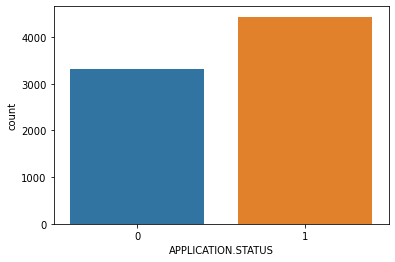

In [86]:
sns.countplot("APPLICATION.STATUS",data=df)

In that More loans are approved vs Rejected

<AxesSubplot:xlabel='GENDER', ylabel='count'>

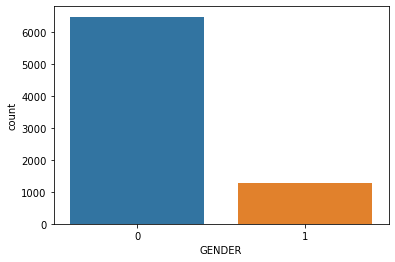

In [87]:
sns.countplot("GENDER",data=df)

count of Male applicants is more than Female

<AxesSubplot:xlabel='MARITAL.STATUS', ylabel='count'>

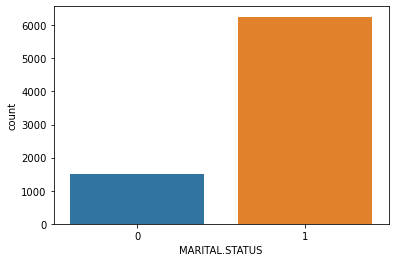

In [88]:
sns.countplot("MARITAL.STATUS",data=df)

count of Married applicant is more than single.

<AxesSubplot:>

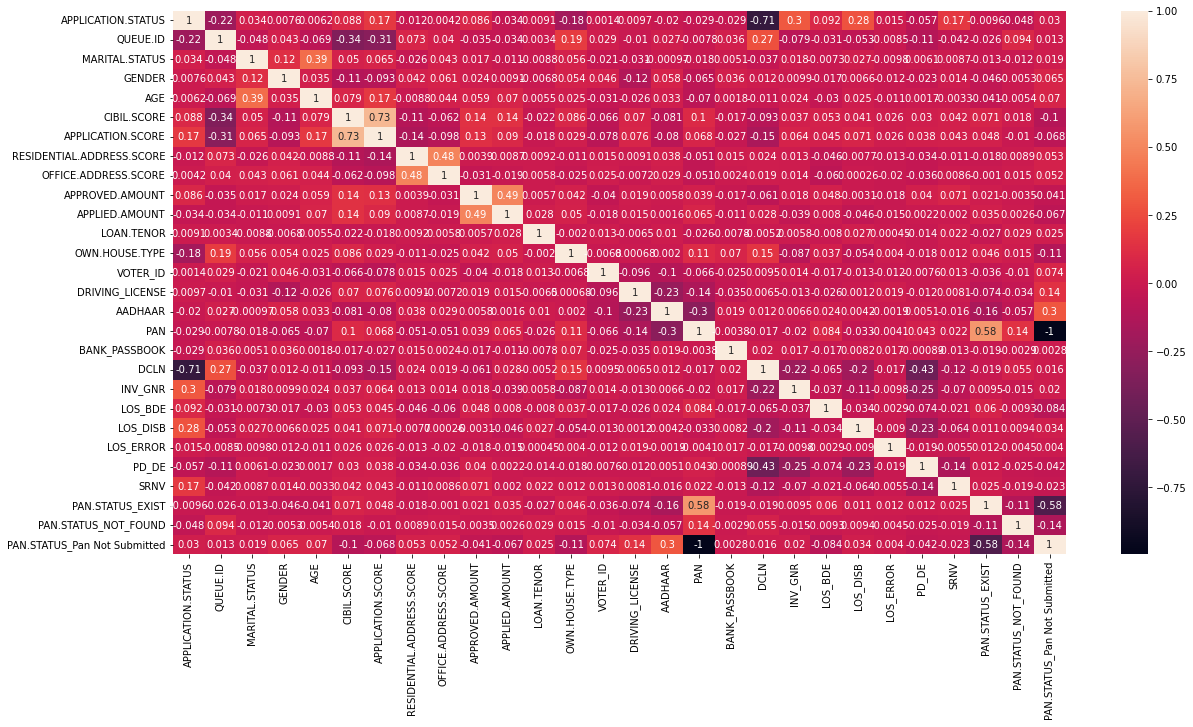

In [89]:
plt.figure(figsize=(20,10))
df.corr()
sns.heatmap(df.corr(),annot=True)

### 2. Logistic regression

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [91]:
log_model=LogisticRegression()


In [92]:
param_grid=[{"penalty":["l1","l2","elasticnet"],
            "C":np.logspace(-4,4,20),
            "solver":["lbfgs","newton-cg","liblinear","sag","saga"],
            "max_iter":[100,1000,2500,5000]}]

In [93]:
from sklearn.model_selection import RandomizedSearchCV

In [94]:
rscv_model=RandomizedSearchCV(log_model,param_grid,cv=5,verbose=True,n_jobs=-1)
rscv_model.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                         'max_iter': [100, 1000, 2500, 5000],
                                         'penalty': ['l1', 'l2', 'elasticnet'],
                                         'solver': ['lbfgs', 'newton-cg',
                                                    'liblinear', 'sag',
                                                    'saga']}],
                   verbose=True)

In [95]:
rscv_model.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 100, 'C': 206.913808111479}

In [96]:
best_model=LogisticRegression(solver="liblinear",
           penalty="l1",
           max_iter= 2500,
           C=0.23357214690901212)
best_model.fit(x_train,y_train)

LogisticRegression(C=0.23357214690901212, max_iter=2500, penalty='l1',
                   solver='liblinear')

### Model train

In [97]:
y_pred=best_model.predict(x_test)
y_pred[10:16]

array([0, 1, 0, 1, 0, 1], dtype=int64)

In [98]:
y_test[10:16]

6113    1
1232    1
1750    0
5196    1
5111    1
4687    1
Name: APPLICATION.STATUS, dtype: int64

In [99]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.884020618556701

In [100]:
confusion_matrix(y_test,y_pred)

array([[563, 101],
       [ 79, 809]], dtype=int64)

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       664
           1       0.89      0.91      0.90       888

    accuracy                           0.88      1552
   macro avg       0.88      0.88      0.88      1552
weighted avg       0.88      0.88      0.88      1552



### Trianing accuracy

In [102]:
y_pred_train=best_model.predict(x_train)
y_pred_train[10:15]

array([0, 1, 1, 1, 1], dtype=int64)

In [103]:
y_train[10:15]

6884    0
6959    1
1523    1
913     1
1272    1
Name: APPLICATION.STATUS, dtype: int64

In [104]:
accuracy=accuracy_score(y_train,y_pred_train)
accuracy

0.8735298856130176

In [105]:
confusion_matrix(y_train,y_pred_train)

array([[2194,  464],
       [ 321, 3228]], dtype=int64)

In [106]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      2658
           1       0.87      0.91      0.89      3549

    accuracy                           0.87      6207
   macro avg       0.87      0.87      0.87      6207
weighted avg       0.87      0.87      0.87      6207



In [107]:
y_pred_prob=best_model.predict_proba(x_test)
y_pred_prob

array([[2.81505477e-01, 7.18494523e-01],
       [4.15429449e-01, 5.84570551e-01],
       [7.08374598e-01, 2.91625402e-01],
       ...,
       [9.99540409e-01, 4.59590694e-04],
       [4.65575038e-01, 5.34424962e-01],
       [9.99647957e-01, 3.52043376e-04]])

In [108]:
y_pred_prob[:,1]

array([7.18494523e-01, 5.84570551e-01, 2.91625402e-01, ...,
       4.59590694e-04, 5.34424962e-01, 3.52043376e-04])

In [109]:
y_pred_prob[:,0]

array([0.28150548, 0.41542945, 0.7083746 , ..., 0.99954041, 0.46557504,
       0.99964796])

### FPR,TPR and threshold values

In [110]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob[:,1])
print(fpr,len(fpr))
print(tpr,len(tpr))
print(threshold,len(threshold))

[0.         0.         0.         0.00150602 0.00150602 0.00301205
 0.00301205 0.0060241  0.0060241  0.00753012 0.00753012 0.00903614
 0.00903614 0.01204819 0.01204819 0.01355422 0.01355422 0.01656627
 0.01656627 0.01957831 0.01957831 0.02108434 0.02108434 0.02259036
 0.02259036 0.02409639 0.02409639 0.02560241 0.02560241 0.02710843
 0.02710843 0.02861446 0.02861446 0.03012048 0.03012048 0.03162651
 0.03162651 0.03313253 0.03313253 0.03614458 0.03614458 0.0376506
 0.0376506  0.03915663 0.03915663 0.04216867 0.04216867 0.04518072
 0.04518072 0.04668675 0.04668675 0.04819277 0.04819277 0.05120482
 0.05120482 0.05271084 0.05271084 0.05572289 0.05572289 0.05722892
 0.05722892 0.06024096 0.06024096 0.06325301 0.06325301 0.06626506
 0.06626506 0.06777108 0.06777108 0.06927711 0.06927711 0.07379518
 0.07379518 0.07680723 0.07680723 0.07981928 0.07981928 0.0813253
 0.0813253  0.08584337 0.08584337 0.0873494  0.0873494  0.08885542
 0.08885542 0.09036145 0.09036145 0.09186747 0.09186747 0.093373

### ROC Curve

Text(0, 0.5, 'TPR')

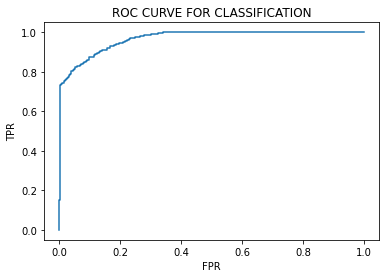

In [111]:
plt.title("ROC CURVE FOR CLASSIFICATION")
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [112]:
roc_auc_score(y_test,y_pred_prob[:,1])

0.9676544013893411

### 3.Descision Tree

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

In [114]:
y_train.value_counts()

1    3549
0    2658
Name: APPLICATION.STATUS, dtype: int64

<AxesSubplot:xlabel='APPLICATION.STATUS', ylabel='count'>

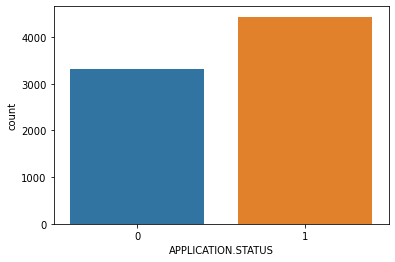

In [115]:
sns.countplot(df["APPLICATION.STATUS"])

### Build Decision tree model

In [116]:
df_model=DecisionTreeClassifier(criterion="gini")

In [117]:
df_model.fit(x_train,y_train)

DecisionTreeClassifier()

### Testing data Accuracy

In [118]:
y_pred_test=df_model.predict(x_test)
y_pred_test[10:16]

array([0, 1, 0, 1, 1, 1], dtype=int64)

In [119]:
y_test[10:16]

6113    1
1232    1
1750    0
5196    1
5111    1
4687    1
Name: APPLICATION.STATUS, dtype: int64

In [120]:
testing_accuracy=accuracy_score(y_test,y_pred_test)
print("Testing data accuracy is:",testing_accuracy)
print()
clf_report=classification_report(y_test,y_pred_test)
print("classification report on testing data is \n:",clf_report)
print()
confusion_matrix(y_test,y_pred_test)

Testing data accuracy is: 0.9768041237113402

classification report on testing data is 
:               precision    recall  f1-score   support

           0       0.98      0.97      0.97       664
           1       0.98      0.98      0.98       888

    accuracy                           0.98      1552
   macro avg       0.98      0.98      0.98      1552
weighted avg       0.98      0.98      0.98      1552




array([[642,  22],
       [ 14, 874]], dtype=int64)

### Training data accuracy

In [121]:
y_pred_train=df_model.predict(x_train)
y_pred_train[10:16]

array([0, 1, 1, 1, 1, 1], dtype=int64)

In [122]:
y_train[10:16]

6884    0
6959    1
1523    1
913     1
1272    1
3914    1
Name: APPLICATION.STATUS, dtype: int64

In [123]:
training_accuracy=accuracy_score(y_train,y_pred_train)
print("Training data accuracy is:",training_accuracy)
print()
clf_report=classification_report(y_train,y_pred_train)
print("classification report on testing data is \n:",clf_report)
print()
confusion_matrix(y_train,y_pred_train)

Training data accuracy is: 1.0

classification report on testing data is 
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2658
           1       1.00      1.00      1.00      3549

    accuracy                           1.00      6207
   macro avg       1.00      1.00      1.00      6207
weighted avg       1.00      1.00      1.00      6207




array([[2658,    0],
       [   0, 3549]], dtype=int64)

### Plot Decision Tree

In [124]:
plt.figure(figsize=(200,100))
tree=plot_tree(decision_tree=df_model,feature_names=df.columns,class_names=["0","1"],filled=True)
plt.savefig("DT.png")

### Hyperparameter Tuning

### 1.GridSearchCV

In [125]:
hyperparameters={"criterion":["gini","entropy"],
                "max_depth":np.arange(2,10),
                "min_samples_split":np.arange(2,21),
                "min_samples_leaf":np.arange(1,15)}
df_model=DecisionTreeClassifier()
gscv_df_model=GridSearchCV(df_model,hyperparameters,cv=5)
gscv_df_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])})

In [126]:
gscv_df_model.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 20}

In [127]:
best_model=DecisionTreeClassifier(max_depth=9,
                                 min_samples_leaf=3,
                                 min_samples_split=20,
                                 criterion="entropy")
best_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=3,
                       min_samples_split=20)

### Testing data accuracy

In [128]:
y_pred_test=best_model.predict(x_test)
y_pred_test[10:16]

array([0, 1, 0, 1, 1, 1], dtype=int64)

In [129]:
y_test[10:16]

6113    1
1232    1
1750    0
5196    1
5111    1
4687    1
Name: APPLICATION.STATUS, dtype: int64

In [130]:
testing_accuracy=accuracy_score(y_test,y_pred_test)
print("Testing data accuracy is:",testing_accuracy)
print()
clf_report=classification_report(y_test,y_pred_test)
print("classification report on testing data is \n:",clf_report)
print()
confusion_matrix(y_test,y_pred_test)

Testing data accuracy is: 0.9896907216494846

classification report on testing data is 
:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       664
           1       0.99      0.99      0.99       888

    accuracy                           0.99      1552
   macro avg       0.99      0.99      0.99      1552
weighted avg       0.99      0.99      0.99      1552




array([[656,   8],
       [  8, 880]], dtype=int64)

### Training data accuracy

In [131]:
y_pred_train=best_model.predict(x_train)
y_pred_train[10:16]

array([0, 1, 1, 1, 1, 1], dtype=int64)

In [132]:
y_train[10:16]

6884    0
6959    1
1523    1
913     1
1272    1
3914    1
Name: APPLICATION.STATUS, dtype: int64

In [133]:
training_accuracy=accuracy_score(y_train,y_pred_train)
print("Training data accuracy is:",training_accuracy)
print()
clf_report=classification_report(y_train,y_pred_train)
print("classification report on testing data is \n:",clf_report)
print()
confusion_matrix(y_train,y_pred_train)

Training data accuracy is: 0.9906557112937007

classification report on testing data is 
:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2658
           1       0.99      0.99      0.99      3549

    accuracy                           0.99      6207
   macro avg       0.99      0.99      0.99      6207
weighted avg       0.99      0.99      0.99      6207




array([[2630,   28],
       [  30, 3519]], dtype=int64)

### Pruning

In [134]:
df_model=DecisionTreeClassifier(ccp_alpha=0.0)
df_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [135]:
values=df_model.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas=values["ccp_alphas"]
ccp_alphas

array([0.00000000e+00, 1.06721505e-04, 1.06928259e-04, 1.28886741e-04,
       1.40969873e-04, 1.50367864e-04, 1.56505328e-04, 1.58231490e-04,
       1.61042721e-04, 1.61108426e-04, 1.61108426e-04, 1.71524919e-04,
       1.75754647e-04, 2.13314292e-04, 2.14811235e-04, 2.47664718e-04,
       2.57773482e-04, 2.76185873e-04, 2.82914109e-04, 2.90570554e-04,
       3.00735728e-04, 3.35642554e-04, 3.51109953e-04, 3.68247831e-04,
       3.86660222e-04, 3.88002793e-04, 5.20176516e-04, 5.62503802e-04,
       5.83506812e-04, 6.15008718e-04, 7.58104649e-04, 1.98052911e-03,
       2.12096899e-03, 3.24975898e-03, 3.64744084e-03, 3.60019310e-02,
       3.73600863e-02, 4.85337948e-02, 7.88512775e-02, 2.45031042e-01])

In [136]:
train_accuracy=[]
testing_accuracy=[]
for ccp_alpha in ccp_alphas:
    df_model=DecisionTreeClassifier(ccp_alpha=ccp_alpha,random_state=10)
    df_model.fit(x_train,y_train)
    train_accuracy.append(df_model.score(x_train,y_train))
    testing_accuracy.append(df_model.score(x_test,y_test))
max(testing_accuracy)
testing_accuracy.index(max(testing_accuracy))
train_accuracy
ccp_alphas[6]
df_model=DecisionTreeClassifier(ccp_alpha=0.0001565053)
df_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0001565053)

### Testing accuracy

In [137]:
y_pred_test=df_model.predict(x_test)
y_pred_test[10:16]

array([0, 1, 0, 1, 1, 1], dtype=int64)

In [138]:
testing_accuracy=accuracy_score(y_test,y_pred_test)
print("Testing data accuracy is:",testing_accuracy)
print()
clf_report=classification_report(y_test,y_pred_test)
print("classification report on testing data is \n:",clf_report)
print()
confusion_matrix(y_test,y_pred_test)

Testing data accuracy is: 0.976159793814433

classification report on testing data is 
:               precision    recall  f1-score   support

           0       0.98      0.97      0.97       664
           1       0.97      0.98      0.98       888

    accuracy                           0.98      1552
   macro avg       0.98      0.97      0.98      1552
weighted avg       0.98      0.98      0.98      1552




array([[641,  23],
       [ 14, 874]], dtype=int64)

### Training accuracy

In [139]:
y_pred_train=df_model.predict(x_train)
y_pred_train[10:16]

array([0, 1, 1, 1, 1, 1], dtype=int64)

In [140]:
training_accuracy=accuracy_score(y_train,y_pred_train)
print("Training data accuracy is:",training_accuracy)
print()
clf_report=classification_report(y_train,y_pred_train)
print("classification report on testing data is \n:",clf_report)
print()
confusion_matrix(y_train,y_pred_train)

Training data accuracy is: 0.9991944578701466

classification report on testing data is 
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2658
           1       1.00      1.00      1.00      3549

    accuracy                           1.00      6207
   macro avg       1.00      1.00      1.00      6207
weighted avg       1.00      1.00      1.00      6207




array([[2655,    3],
       [   2, 3547]], dtype=int64)

In [141]:
plt.figure(figsize=(200,100))
tree=plot_tree(decision_tree=df_model,feature_names=df.columns,class_names=["0","1"],filled=True)
plt.savefig("DT_pruning_ccp.png")

### 4.Random Forest

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
rf_model=RandomForestClassifier(n_estimators=200,random_state=0)
rf_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

### Testing accuracy

In [144]:
y_pred_test=rf_model.predict(x_test)
testing_accuracy=accuracy_score(y_test,y_pred_test)
print("Testing data accuracy is:",testing_accuracy)
print()
clf_report=classification_report(y_test,y_pred_test)
print("classification report on testing data is \n:",clf_report)
print()
confusion_matrix(y_test,y_pred_test)

Testing data accuracy is: 0.9813144329896907

classification report on testing data is 
:               precision    recall  f1-score   support

           0       0.98      0.97      0.98       664
           1       0.98      0.99      0.98       888

    accuracy                           0.98      1552
   macro avg       0.98      0.98      0.98      1552
weighted avg       0.98      0.98      0.98      1552




array([[645,  19],
       [ 10, 878]], dtype=int64)

### Training accuracy

In [145]:
y_pred_train=rf_model.predict(x_train)
training_accuracy=accuracy_score(y_train,y_pred_train)
print("Training data accuracy is:",training_accuracy)
print()
clf_report=classification_report(y_train,y_pred_train)
print("classification report on testing data is \n:",clf_report)
print()
confusion_matrix(y_train,y_pred_train)

Training data accuracy is: 1.0

classification report on testing data is 
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2658
           1       1.00      1.00      1.00      3549

    accuracy                           1.00      6207
   macro avg       1.00      1.00      1.00      6207
weighted avg       1.00      1.00      1.00      6207




array([[2658,    0],
       [   0, 3549]], dtype=int64)

### Hyperparameter Tuning

In [146]:
hyp = {'criterion' : ['gini','entropy'],
'max_depth' : np.arange(2,10),
'min_samples_split' : np.arange(2,10),
'min_samples_leaf' : np.arange(1,10),
'n_estimators' : np.arange(10,100)}

In [147]:
rf_model = RandomForestClassifier(random_state=10)
rscv_rf_model = RandomizedSearchCV(rf_model,hyp,cv = 5)
rscv_rf_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])})

In [148]:
rscv_rf_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 3,
 'min_samples_leaf': 6,
 'max_depth': 7,
 'criterion': 'gini'}

In [149]:
best_model=RandomForestClassifier(n_estimators=70,
                                  min_samples_split= 3,
                                  min_samples_leaf=6,
                                  max_depth= 7,
                                  criterion= 'gini')
best_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=6, min_samples_split=3,
                       n_estimators=70)

### Testing accuracy

In [150]:
y_pred_test=best_model.predict(x_test)
testing_accuracy=accuracy_score(y_test,y_pred_test)
print("Testing data accuracy is:",testing_accuracy)
print()
clf_report=classification_report(y_test,y_pred_test)
print("classification report on testing data is \n:",clf_report)
print()
confusion_matrix(y_test,y_pred_test)

Testing data accuracy is: 0.9748711340206185

classification report on testing data is 
:               precision    recall  f1-score   support

           0       0.98      0.96      0.97       664
           1       0.97      0.99      0.98       888

    accuracy                           0.97      1552
   macro avg       0.98      0.97      0.97      1552
weighted avg       0.98      0.97      0.97      1552




array([[635,  29],
       [ 10, 878]], dtype=int64)

### Training accuracy

In [151]:
y_pred_train=best_model.predict(x_train)
training_accuracy=accuracy_score(y_train,y_pred_train)
print("Training data accuracy is:",training_accuracy)
print()
clf_report=classification_report(y_train,y_pred_train)
print("classification report on testing data is \n:",clf_report)
print()
confusion_matrix(y_train,y_pred_train)

Training data accuracy is: 0.9761559529563396

classification report on testing data is 
:               precision    recall  f1-score   support

           0       0.98      0.96      0.97      2658
           1       0.97      0.99      0.98      3549

    accuracy                           0.98      6207
   macro avg       0.98      0.97      0.98      6207
weighted avg       0.98      0.98      0.98      6207




array([[2555,  103],
       [  45, 3504]], dtype=int64)